In [21]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
G = nx.Graph()

In [23]:
urunler = ['Deodorant', 'Şampuan', 'Duş Jeli', 'Makarna', 'Meşrubat', 'Salça', 'Tuz', 'Bebek Bezi', 'Mama', 'Islak Mendil']
for urun in urunler:
    G.add_node(urun)

In [24]:
G.add_edge('Deodorant', 'Şampuan', attr='M', color='blue')
G.add_edge('Deodorant', 'Duş Jeli', attr = 'M', color='blue')
G.add_edge('Şampuan', 'Duş Jeli', attr='M', color='blue')

G.add_edge('Deodorant', 'Makarna', attr='Y', color='green')
G.add_edge('Deodorant', 'Meşrubat', attr='Y', color='green')
G.add_edge('Duş Jeli', 'Makarna', attr='Y', color='green')
G.add_edge('Duş Jeli', 'Meşrubat', attr='Y', color='green')
G.add_edge('Makarna', 'Meşrubat', attr='Y', color='green')

G.add_edge('Salça', 'Makarna', attr='T', color='orange')
G.add_edge('Salça', 'Tuz', attr='T', color='orange')
G.add_edge('Salça', 'Bebek Bezi', attr='T', color='orange')
G.add_edge('Makarna', 'Tuz', attr='T', color='orange')
G.add_edge('Makarna', 'Bebek Bezi', attr='T', color='orange')
G.add_edge('Tuz', 'Bebek Bezi', attr='T', color='orange')

G.add_edge('Mama', 'Bebek Bezi', attr='S', color='gold')
G.add_edge('Mama', 'Islak Mendil', attr='S', color='gold')
G.add_edge('Bebek Bezi', 'Islak Mendil', attr='S', color='gold')

In [25]:
print("Number of nodes: ", G.order())
print("Number of edges: ", G.size())

Number of nodes:  10
Number of edges:  17


In [61]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1, 1, 1, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=int64)

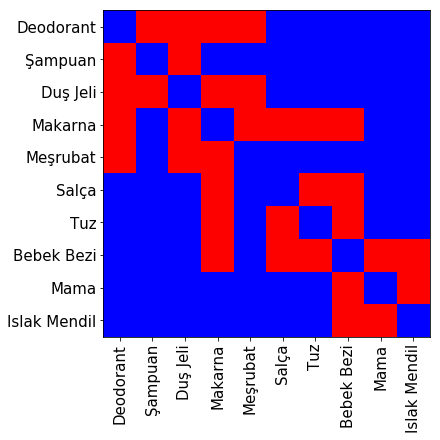

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(nx.adjacency_matrix(G).todense(), cmap='seismic', vmax=1.5, vmin=-0.5)

ax.set_xticks(range(len(urunler)))
ax.set_yticks(range(len(urunler)))

ax.set_xticklabels(urunler, fontsize=15, rotation=90)
_ = ax.set_yticklabels(urunler, fontsize=15)

In [53]:
np.random.seed(0)
pos = nx.spring_layout(G)

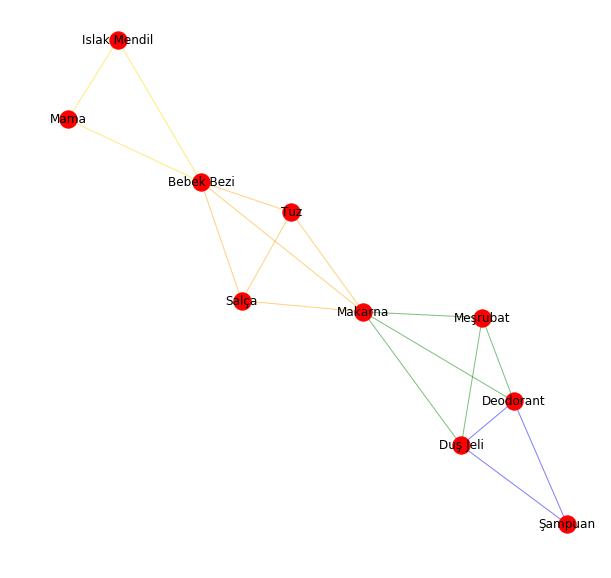

In [54]:
plt.figure(figsize=(10,10));
plt.axis("off");

foo = nx.get_edge_attributes(G,'color')
colors = [foo[k, v] for k, v in nx.edges(G) ]

nx.draw_networkx_nodes(G, pos, node_size=300, nodecolor='lightgray')
nx.draw_networkx_edges(G, pos, alpha=0.500, edge_color=colors)

nx.draw_networkx_labels(G, pos, font_color="black")

plt.show()

In [70]:
degrees = sorted(list(G.degree), key=lambda x: -x[1])
degrees

[('Makarna', 6),
 ('Bebek Bezi', 5),
 ('Deodorant', 4),
 ('Duş Jeli', 4),
 ('Meşrubat', 3),
 ('Salça', 3),
 ('Tuz', 3),
 ('Şampuan', 2),
 ('Mama', 2),
 ('Islak Mendil', 2)]

In [74]:
names, vals = zip(*degrees)

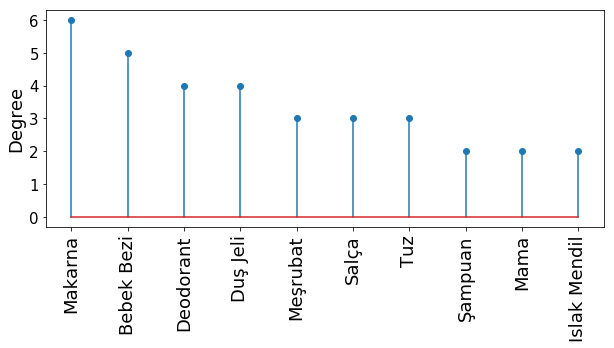

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.stem(vals)
ax.set_xticks(range(len(names)))
ax.set_ylabel('Degree', fontsize=18)
ax.tick_params(labelsize=15)
_ = ax.set_xticklabels(names, rotation=90, fontsize=18)